In [6]:
import os
import glob
import re
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

from umap import UMAP
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans  # Import KMeans from sklearn.cluster
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import MeanShift
import matplotlib.colors as mcol

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
# list of reference points
pdb_green_filenames = [
    "6cb0_A_CYS_SG_257_A_LYS_NZ_255.pdb", "6cb0_B_CYS_SG_257_B_LYS_NZ_255.pdb", "2ccm_A_CYS_SG_24_A_LYS_NZ_41.pdb",
    "2ccm_B_CYS_SG_24_B_LYS_NZ_41.pdb", "3cze_A_CYS_SG_173_A_LYS_NZ_320.pdb", "3czg_A_CYS_SG_173_A_LYS_NZ_320.pdb",
    "1esi_A_CYS_SG_98_A_LYS_NZ_38.pdb", "6faj_A_CYS_SG_149_A_LYS_NZ_307.pdb", "6faj_B_CYS_SG_149_B_LYS_NZ_307.pdb",
    "6fbp_A_CYS_SG_149_A_LYS_NZ_307.pdb", "6fbp_B_CYS_SG_149_B_LYS_NZ_307.pdb", "3fd5_A_CYS_SG_31_A_LYS_NZ_27.pdb",
    "3fd5_B_CYS_SG_31_B_LYS_NZ_27.pdb", "3fuo_A_CYS_SG_1279_A_LYS_NZ_1235.pdb", "4fvq_A_CYS_SG_747_A_LYS_NZ_650.pdb",
    "4ga9_A_CYS_SG_17_A_LYS_NZ_100.pdb", "4ga9_A_CYS_SG_89_A_LYS_NZ_100.pdb", "4ga9_B_CYS_SG_17_B_LYS_NZ_100.pdb",
    "4ga9_B_CYS_SG_89_B_LYS_NZ_100.pdb", "6i5i_A_CYS_SG_151_A_LYS_NZ_174.pdb", "1i7e_A_CYS_SG_370_A_LYS_NZ_339.pdb",
    "4jhy_A_CYS_SG_37_A_LYS_NZ_32.pdb", "1m3q_A_CYS_SG_253_A_LYS_NZ_249.pdb", "4mtl_B_CYS_SG_160_B_LYS_NZ_76.pdb",
    "3na8_A_CYS_SG_227_A_LYS_NZ_185.pdb", "3na8_B_CYS_SG_227_B_LYS_NZ_185.pdb", "3na8_C_CYS_SG_227_C_LYS_NZ_185.pdb",
    "3na8_D_CYS_SG_227_D_LYS_NZ_185.pdb", "4np9_A_CYS_SG_473_A_LYS_NZ_423.pdb", "2nx9_A_CYS_SG_148_A_LYS_NZ_178.pdb",
    "2nx9_B_CYS_SG_148_B_LYS_NZ_178.pdb", "1o5u_A_CYS_SG_41_A_LYS_NZ_84.pdb", "1o5u_B_CYS_SG_41_B_LYS_NZ_84.pdb",
    "6pck_A_CYS_SG_68_A_LYS_NZ_74.pdb", "3ptr_B_CYS_SG_240_B_LYS_NZ_266.pdb", "3pua_A_CYS_SG_240_A_LYS_NZ_266.pdb",
    "2py5_A_CYS_SG_106_A_LYS_NZ_114.pdb", "3qwl_A_CYS_SG_286_A_LYS_NZ_233.pdb", "6sdp_A_CYS_SG_154_A_LYS_NZ_158.pdb",
    "6t3x_A_CYS_SG_54_A_LYS_NZ_132.pdb", "6t3x_C_CYS_SG_54_C_LYS_NZ_132.pdb", "3u7z_A_CYS_SG_100_A_LYS_NZ_128.pdb",
    "3u7z_B_CYS_SG_100_B_LYS_NZ_128.pdb", "6ulh_A_CYS_SG_314_A_LYS_NZ_320.pdb", "1uxb_A_CYS_SG_333_A_LYS_NZ_295.pdb",
    "1uxb_B_CYS_SG_333_B_LYS_NZ_295.pdb", "1uxb_C_CYS_SG_333_C_LYS_NZ_295.pdb", "6uxe_D_CYS_SG_95_D_LYS_NZ_135.pdb",
    "3vcr_A_CYS_SG_162_A_LYS_NZ_136.pdb", "3vcr_B_CYS_SG_162_B_LYS_NZ_136.pdb", "6w1d_D_CYS_SG_95_D_LYS_NZ_135.pdb",
    "6wi2_A_CYS_SG_381_D_LYS_NZ_135.pdb", "6wi2_D_CYS_SG_95_D_LYS_NZ_135.pdb", "6wih_A_CYS_SG_381_D_LYS_NZ_135.pdb",
    "6wih_D_CYS_SG_95_D_LYS_NZ_135.pdb", "2wpg_A_CYS_SG_174_A_LYS_NZ_321.pdb", "3wva_A_CYS_SG_9_A_LYS_NZ_79.pdb",
    "3wva_B_CYS_SG_9_B_LYS_NZ_79.pdb", "3wvb_A_CYS_SG_9_A_LYS_NZ_79.pdb", "3wvb_B_CYS_SG_9_B_LYS_NZ_79.pdb",
    "2xhi_A_CYS_SG_249_A_LYS_NZ_253.pdb", "6xmk_B_CYS_SG_22_B_LYS_NZ_61.pdb", "6y2f_A_CYS_SG_22_A_LYS_NZ_61.pdb",
    "5y72_B_CYS_SG_223_B_LYS_NZ_275.pdb", "2y8k_A_CYS_SG_95_A_LYS_NZ_106.pdb", "5yzp_A_CYS_SG_390_A_LYS_NZ_267.pdb",
    "6zln_A_CYS_SG_151_A_LYS_NZ_174.pdb", "4ndb_B_CYS_SG_24_B_LYS_NZ_41.pdb", "1skf_A_CYS_SG_98_A_LYS_NZ_38.pdb",
    "3rq4_A_CYS_SG_111_A_LYS_NZ_122.pdb", "6f1w_B_CYS_SG_71_B_LYS_NZ_57.pdb", "3e46_A_CYS_SG_92_A_LYS_NZ_97.pdb",
    "5y72_A_CYS_SG_223_A_LYS_NZ_275.pdb", "6uxe_A_CYS_SG_158_A_HIS_ND1_156.pdb", "1es5_A_CYS_SG_98_A_LYS_NZ_38.pdb",
    "6eut_A_CYS_SG_205_A_LYS_NZ_163.pdb", "6f1w_A_CYS_SG_71_A_LYS_NZ_57.pdb", "4ndb_A_CYS_SG_24_A_LYS_NZ_41.pdb",
    "1es2_A_CYS_SG_98_A_LYS_NZ_38.pdb", "4mtl_A_CYS_SG_160_A_LYS_NZ_76.pdb"]


In [8]:
def get_feature(dataf, feature):
    """"
    Get the values of a feature from a dataframe
    :param dataf: dataframe
    :param feature: string
    :return: values of the feature
    """
    vals = dataf[feature]
    return vals

In [9]:
path_data = "../Data/Ref_points_LYS_CYS"
path_cys_arg_f2 = os.path.join(path_data,"all_ref_points.txt")

In [10]:
df_f2 = pd.read_csv(path_cys_arg_f2, sep="\t", header=None, skiprows=1, comment='#')


df_f2.columns = ["Chain_S", "Res_S", "S_id",	"Res_S_num", "bfac_S", "bfac_S_BDB", "occ_S", "SASA_S",
                   "SASA_atom_S","Chain_N", "Res_N", "N_id", "Res_N_num", "bfac_N", "bfac_N_BDB" ,"occ_N", 
                   "SASA_N", "SASA_atom_N", "CN_id", "bfac_CN", "occu_CN", "Res_CS", "CS_id", 
                   "bfac_CS", "occu_CS", "distance_SN", "distanceCN", "distanceCS", "angle_CSN", "angle_CNS", 
                   "torsion_CS_NC",'ngb_Res_toN', 'ngb_Res_toS'
                      , "Close_contact", "greenBlob", "filename"]

In [11]:
def hash_set(set_data):
    """
    Perform hashing on a set of data
    :param set_data: set of data to be hashed
    """
    try:
        if isinstance(set_data, (list, tuple, set)):
            set_values = set(set_data)
        elif isinstance(set_data, str):
            set_values = set(eval(set_data)) 
        else:
            set_values = {set_data}

        sorted_tuple = tuple(sorted(set_values))
        hashed_value = hash(sorted_tuple)

        return hashed_value

    except Exception as e:
        print(f"Error processing set_data: {e}")
        return None

In [12]:
def feature_collector(dataini, output=False):
    """
    Collect features from a dataframe
    :param dataini: dataframe
    :param output: boolean   
    :return: all features 
    """
    
    dataset = dataini.drop(columns=['Chain_S', 'Res_S', 'S_id', 'CS_id', 'Chain_N', "Res_CS",
                                'Res_N', 'N_id', 'CN_id', 'Res_S_num', 'Res_N_num',
                                    "occ_S", "occ_N",
                                    "Close_contact"])

    sasa_s = get_feature(dataset, "SASA_S").astype(float)
    sasa_atom_s = get_feature(dataset, "SASA_atom_S").astype(float)
    sasa_n = get_feature(dataset, "SASA_N").astype(float)
    sasa_atom_n = get_feature(dataset, "SASA_atom_N").astype(float)
    
    
    bfac_s = get_feature(dataset, "bfac_S").astype(float)
    bfac_s_bdb = get_feature(dataset, "bfac_S_BDB").astype(float)
    bfac_n = get_feature(dataset, "bfac_N").astype(float)
    bfac_n_bdb = get_feature(dataset, "bfac_N_BDB").astype(float)
    bfac_cn = get_feature(dataset, "bfac_CN").astype(float)
    bfac_cs = get_feature(dataset, "bfac_CS").astype(float)
    
    dist_sn = get_feature(dataset, "distance_SN").astype(float)
    dist_cn = get_feature(dataset, "distanceCN").astype(float)
    dist_cs = get_feature(dataset, "distanceCS").astype(float)
    
    angle_csn = get_feature(dataset, "angle_CSN").astype(float)
    angle_cns = get_feature(dataset, "angle_CNS").astype(float)
    tors_cs_nc = get_feature(dataset, "torsion_CS_NC").astype(float)

    nres_s = dataset['ngb_Res_toS'].apply(hash_set).astype(float)
    nres_s_norm = (nres_s - nres_s.mean()) / nres_s.std()

    nres_n = dataset['ngb_Res_toN'].apply(hash_set).astype(float)
    nres_n_norm = (nres_n - nres_n.mean()) / nres_n.std()


    if output==False:
        return sasa_s, sasa_atom_s, sasa_n, sasa_atom_n, bfac_s, bfac_s_bdb, bfac_n, bfac_n_bdb, bfac_cn, bfac_cs, dist_sn, dist_cn, dist_cs, angle_csn, angle_cns, tors_cs_nc, nres_s, nres_n, nres_s_norm, nres_n_norm
    else:
        nres_s_norm2 = dataset['ngb_Res_toS_normalized']
        nres_n_norm2 = dataset['ngb_Res_toN_normalized']
        return sasa_s, sasa_atom_s, sasa_n, sasa_atom_n, bfac_s, bfac_s_bdb, bfac_n, bfac_n_bdb, bfac_cn, bfac_cs, dist_sn, dist_cn, dist_cs, angle_csn, angle_cns, tors_cs_nc, nres_s, nres_n, nres_s_norm, nres_n_norm, nres_s_norm2, nres_n_norm2


In [13]:
def df_creator(dataini, output=False):
    """
    Create a dataframe from the data
    :param dataini: data to be used to create the dataframe
    :param output_ngb_norm2: boolean to determine if the output should include the normalized ngb_Res_toS and ngb_Res_toN
    """
    if output==False:
        sasa_s, sasa_atom_s, sasa_n, sasa_atom_n, bfac_s, bfac_s_bdb, bfac_n, bfac_n_bdb, bfac_cn, bfac_cs, dist_sn, dist_cn, dist_cs, angle_csn, angle_cns, tors_cs_nc, nres_s, nres_n, nres_s_norm, nres_n_norm= feature_collector(dataini) 
    else:
        sasa_s, sasa_atom_s, sasa_n, sasa_atom_n, bfac_s, bfac_s_bdb, bfac_n, bfac_n_bdb, bfac_cn, bfac_cs, dist_sn, dist_cn, dist_cs, angle_csn, angle_cns, tors_cs_nc, nres_s, nres_n, nres_s_norm, nres_n_norm, nres_s_norm2, nres_n_norm2= feature_collector(dataini, output)

    dataset = dataini.drop(columns=['Chain_S', 'Res_S', 'S_id', 'CS_id', 'Chain_N', "Res_CS",
                                'Res_N', 'N_id', 'CN_id','greenBlob'])
    if output==False:
        visu_df = pd.DataFrame(
        {
        'SASA_N': sasa_n,
        'SASA_S': sasa_s,
        'SASA_atom_N':   sasa_atom_n,
        'SASA_atom_S':   sasa_atom_s,
        'bfac_N_BDB': bfac_n_bdb,
        'bfac_N': bfac_n,
        'bfac_S_BDB': bfac_s_bdb,
        'bfac_S': bfac_s,
        'distance_CN': dist_cn,
        'distance_SN': dist_sn,
        'angle_CSN': angle_csn, 
        'angle_CNS': angle_cns, 
        'torsion_CS_NC': tors_cs_nc, 
        'ngb_Res_toS_normalized': nres_s_norm,
        'ngb_Res_toN_normalized': nres_n_norm,
        })
    else:
        visu_df = pd.DataFrame(
        {
        'SASA_N': sasa_n,
        'SASA_S': sasa_s,
        'SASA_atom_N':   sasa_atom_n,
        'SASA_atom_S':   sasa_atom_s,
        'bfac_N_BDB': bfac_n_bdb,
        'bfac_N': bfac_n,
        'bfac_S_BDB': bfac_s_bdb,
        'bfac_S': bfac_s,
        'distance_CN': dist_cn,
        'distance_SN': dist_sn,
        'angle_CSN': angle_csn, 
        'angle_CNS': angle_cns, 
        'torsion_CS_NC': tors_cs_nc, 
        'ngb_Res_toS_normalized': nres_s_norm,
        'ngb_Res_toN_normalized': nres_n_norm,
        'ngb_Res_toS_normalized2': nres_s_norm2,
        'ngb_Res_toN_normalized2': nres_n_norm2,
        })
        

    visu_df['filename'] = dataset['filename']
    visu_df['index'] = np.arange(visu_df.shape[0])

    return visu_df

dataset_f2 = df_creator(df_f2)


0 SASA_N (a)
1 SASA_S (b)
2 SASA_atom_N (c)
3 SASA_atom_S (d)
4 bfac_N_BDB (e)
5 bfac_N (f)
6 bfac_S_BDB (g)
7 bfac_S (h)
8 distance_CN (i)
9 distance_SN (j)
10 angle_CSN (k)
11 angle_CNS (l)
12 torsion_CS_NC (m)
13 ngb_Res_toS_normalized (n)
14 ngb_Res_toN_normalized (o)


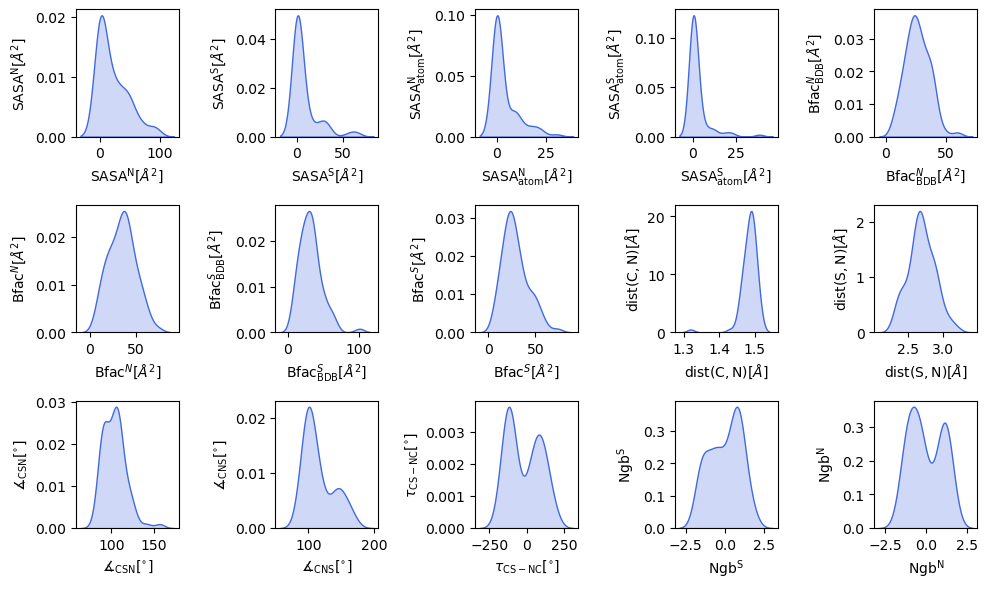

In [14]:
labels=[r"${\rm SASA}^{\rm N}[\AA^{2}]$", 
        r"${\rm SASA}^{\rm S}[\AA^{2}]$", 
        r"${\rm SASA}_{\rm atom}^{\rm N}[\AA^{2}]$" ,
        r"${\rm SASA}_{\rm atom}^{\rm S}[\AA^{2}]$" ,
        r"${\rm Bfac}^{N}_{\rm BDB}[\AA^{2}]$",
        r"${\rm Bfac}^{N}[\AA^{2}]$",
        r"${\rm Bfac}^{S}_{\rm BDB}[\AA^{2}]$",
        r"${\rm Bfac}^{S}[\AA^{2}]$",
        r"${\rm dist(C,N)}[\AA]$", 
        r"${\rm dist(S,N)}[\AA]$",
        r"${\measuredangle}_{\rm CSN}[^{\circ}]$",
        r"${\measuredangle}_{\rm CNS}[^{\circ}]$", 
        r"${\tau}_{\rm CS-NC}[^{\circ}]$",
        r"${\rm Ngb}^{\rm S}$",
        r"${\rm Ngb}^{\rm N}$"]



col_list= ["SASA_N", "SASA_S", "SASA_atom_N", "SASA_atom_S", "bfac_N_BDB", "bfac_N", "bfac_S_BDB", "bfac_S",
            "distance_CN", "distance_SN", "angle_CSN",  "angle_CNS",
             "torsion_CS_NC",
              "ngb_Res_toS_normalized",
              "ngb_Res_toN_normalized"]
lbl_list= ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '(l)', '(m)', '(n)', '(o)']
coord_x = [95, 40, 1.52, 150, 2., 25, 98, 2.9, 175, 2.01]
coord_y = [0.015, 0.033, 18, 0.022, 0.3, 0.075, 0.025, 2.5, 0.02, 0.337]
combined_data = dataset_f2.drop(columns=['index', 'filename']).reindex(columns=col_list)
fig = plt.figure(figsize=(10,6))
plt.subplots_adjust(hspace=0.5, wspace=1.)
for i, col in enumerate(combined_data.columns):
    print(i, col, lbl_list[i])
    plt.subplot(3, 5, i+1)
    sns.kdeplot(combined_data[col], shade=True, color="royalblue")

    plt.xlabel(labels[i])
    plt.ylabel(labels[i])

plt.tight_layout()   
plt.savefig("Figs/Supp_figures/Figs_densityplot_expNOS.png")